# Classifier Model

In [127]:
#Importing pandas to load in the dataset
import pandas as pd

In [128]:
#Loading in the dataset
diabetes = pd.read_csv('../DataSet/diabetes.csv')

In [129]:
#Testing showing if data loaded properly
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
#Showing the columns of the data
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [131]:
#Creating an array for normalizing those columns
col_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [132]:
#Normalizing the data
diabetes[col_norm] = diabetes[col_norm].apply( lambda x : (x - x.min() ) / (x.max() - x.min()) )

In [133]:
#Checking if the data is normalize
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [134]:
#Importing tensorflow 
import tensorflow as tf

In [135]:
#Creating the feature columns for the model
preg = tf.feature_column.numeric_column('Pregnancies')
gluc = tf.feature_column.numeric_column('Glucose')
bloodpressure = tf.feature_column.numeric_column('BloodPressure')
skinthickness = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigres = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

In [136]:
#Importing matplotlib to visual data
import matplotlib.pyplot as plt

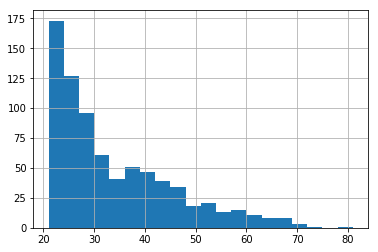

In [137]:
#Showing a histogram by age 
diabetes['Age'].hist(bins=20)

In [138]:
#Spliting the age into groups
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [139]:
#Adding all the feature columns into one list
feat_cols = [preg, gluc, bloodpressure, skinthickness, insulin, bmi, pedigres, age_bucket]

In [140]:
#Creating X Data 
X_data = diabetes.drop('Outcome', axis=1)

In [141]:
#Checking X Data
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [142]:
#Creating label and checking the data
label = diabetes['Outcome']
label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [143]:
#Importing the sklearn train_test_split function
from sklearn.model_selection import train_test_split

In [144]:
#Spliting the up the data
x_train, x_test, y_train, y_test = train_test_split(X_data, label, test_size=0.3)

In [145]:
#Creating an input function for the model
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [146]:
#Creating an evaluatiin input function for testing the model
eval_func = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [147]:
#Creating the model
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmp9_bmotgv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13d67a3c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [148]:
#Training the model
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmp9_bmotgv/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 6.8683887, step = 101 (0.283 sec)
INFO:tensorflow:global_step/sec: 575.534
INFO:tensorflow:loss = 5.469163, step = 201 (0.174 sec)
INFO:tensorflow:global_step/sec: 574.967
INFO:tensorflow:loss = 4.306763, step = 301 (0.173 sec)
INFO:tensorflow:global_step/sec: 647.978
INFO:tensorflow:loss = 6.0254307, step = 401 (0.156 sec)
INFO:tensorflow:global_step/sec: 203.726
INFO:tensorflow:loss = 7.06803, step = 501 (0.489 sec)
INFO:tensorflow:global_step/sec: 594.598
INFO:tensorflow:loss = 3.3569949, step = 601 (0.169 sec)
INFO:tensorflow:gl

In [149]:
#Evaluating against test data
eval_metrics = model.evaluate(input_fn=eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-26T16:40:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmp9_bmotgv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-26-16:40:26
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.8124691, auc_precision_recall = 0.71844894, average_loss = 0.51904774, global_step = 1000, label/mean = 0.35064936, loss = 4.9958344, precision = 0.6730769, prediction/mean = 0.34647986, recall = 0.43209878
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmp9_bmotgv/model.ckpt-1000


In [150]:
#Printing out those metrics
eval_metrics

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8124691,
 'auc_precision_recall': 0.71844894,
 'average_loss': 0.51904774,
 'label/mean': 0.35064936,
 'loss': 4.9958344,
 'precision': 0.6730769,
 'prediction/mean': 0.34647986,
 'recall': 0.43209878,
 'global_step': 1000}

In [151]:
#Creating a prediction input functions
pred_func = tf.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs=1, shuffle=False)

In [152]:
#Gettting the results from the predictions
result = model.predict(input_fn=pred_func)
gen = list(result)
gen

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmp9_bmotgv/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.7269635], dtype=float32),
  'logistic': array([0.15097636], dtype=float32),
  'probabilities': array([0.84902364, 0.15097639], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5290966], dtype=float32),
  'logistic': array([0.37072763], dtype=float32),
  'probabilities': array([0.6292724 , 0.37072763], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.6539226], dtype=float32),
  'logistic': array([0.1605795], dtype=float32),
  'probabilities': array([0.8394205 , 0.16057952], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.1088891], dtype=float32),
  'logistic': array([0.4728046], dtype=float32),
  'probabilities': array([0.5271954 , 0.47280458], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.5376568], dtype=float32),
  'logistic': 

# Dense Neural Network for classification

In [153]:
#Creating a dense Nerual Networks with 3 layers and 10 node each
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], n_classes=2, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmpdz1vd_r0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13bbb50b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [154]:
#Traing the Dense network 
dnn_model.train(input_fn=input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmpdz1vd_r0/model.ckpt.
INFO:tensorflow:loss = 6.814948, step = 1
INFO:tensorflow:global_step/sec: 318.777
INFO:tensorflow:loss = 5.258072, step = 101 (0.318 sec)
INFO:tensorflow:global_step/sec: 270.776
INFO:tensorflow:loss = 4.6185293, step = 201 (0.365 sec)
INFO:tensorflow:global_step/sec: 587.23
INFO:tensorflow:loss = 3.966128, step = 301 (0.172 sec)
INFO:tensorflow:global_step/sec: 479.01
INFO:tensorflow:loss = 5.835161, step = 401 (0.215 sec)
INFO:tensorflow:global_step/sec: 489.63
INFO:tensorflow:loss = 4.0275784, step = 501 (0.199 sec)
INFO:tensorflow:global_step/sec: 650.927
INFO:tensorflow:loss = 2.0075438, step = 601 (0.151 sec)
INFO:tensorflow:glob

INFO:tensorflow:loss = 3.3912044, step = 8001 (0.158 sec)
INFO:tensorflow:global_step/sec: 626.488
INFO:tensorflow:loss = 2.1396668, step = 8101 (0.159 sec)
INFO:tensorflow:global_step/sec: 644.799
INFO:tensorflow:loss = 4.838236, step = 8201 (0.155 sec)
INFO:tensorflow:global_step/sec: 669.461
INFO:tensorflow:loss = 4.759782, step = 8301 (0.152 sec)
INFO:tensorflow:global_step/sec: 624.06
INFO:tensorflow:loss = 6.1620016, step = 8401 (0.157 sec)
INFO:tensorflow:global_step/sec: 645.903
INFO:tensorflow:loss = 2.258517, step = 8501 (0.155 sec)
INFO:tensorflow:global_step/sec: 650.508
INFO:tensorflow:loss = 5.2516904, step = 8601 (0.154 sec)
INFO:tensorflow:global_step/sec: 675.635
INFO:tensorflow:loss = 2.2868404, step = 8701 (0.148 sec)
INFO:tensorflow:global_step/sec: 644.707
INFO:tensorflow:loss = 4.0088596, step = 8801 (0.155 sec)
INFO:tensorflow:global_step/sec: 668.973
INFO:tensorflow:loss = 5.095673, step = 8901 (0.152 sec)
INFO:tensorflow:global_step/sec: 624.193
INFO:tensorflow

INFO:tensorflow:global_step/sec: 623.686
INFO:tensorflow:loss = 7.6788445, step = 16301 (0.162 sec)
INFO:tensorflow:global_step/sec: 679.63
INFO:tensorflow:loss = 2.3532164, step = 16401 (0.147 sec)
INFO:tensorflow:global_step/sec: 656.305
INFO:tensorflow:loss = 2.5931697, step = 16501 (0.149 sec)
INFO:tensorflow:global_step/sec: 656.189
INFO:tensorflow:loss = 2.6910074, step = 16601 (0.153 sec)
INFO:tensorflow:global_step/sec: 530.175
INFO:tensorflow:loss = 3.355343, step = 16701 (0.190 sec)
INFO:tensorflow:global_step/sec: 557.059
INFO:tensorflow:loss = 6.0542965, step = 16801 (0.180 sec)
INFO:tensorflow:global_step/sec: 694.832
INFO:tensorflow:loss = 6.003182, step = 16901 (0.144 sec)
INFO:tensorflow:global_step/sec: 700.176
INFO:tensorflow:loss = 4.3258986, step = 17001 (0.146 sec)
INFO:tensorflow:global_step/sec: 654.096
INFO:tensorflow:loss = 2.8883793, step = 17101 (0.151 sec)
INFO:tensorflow:global_step/sec: 630.7
INFO:tensorflow:loss = 2.7215734, step = 17201 (0.158 sec)
INFO:

INFO:tensorflow:loss = 5.753319, step = 24501 (0.162 sec)
INFO:tensorflow:global_step/sec: 617.585
INFO:tensorflow:loss = 3.7506347, step = 24601 (0.162 sec)
INFO:tensorflow:global_step/sec: 637.65
INFO:tensorflow:loss = 2.305626, step = 24701 (0.157 sec)
INFO:tensorflow:global_step/sec: 666.116
INFO:tensorflow:loss = 6.077704, step = 24801 (0.151 sec)
INFO:tensorflow:global_step/sec: 708.974
INFO:tensorflow:loss = 3.4373205, step = 24901 (0.140 sec)
INFO:tensorflow:global_step/sec: 645.911
INFO:tensorflow:loss = 0.5565402, step = 25001 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.327
INFO:tensorflow:loss = 2.8288279, step = 25101 (0.157 sec)
INFO:tensorflow:global_step/sec: 608.517
INFO:tensorflow:loss = 5.610792, step = 25201 (0.164 sec)
INFO:tensorflow:global_step/sec: 616.218
INFO:tensorflow:loss = 5.2316856, step = 25301 (0.162 sec)
INFO:tensorflow:global_step/sec: 676.361
INFO:tensorflow:loss = 3.564785, step = 25401 (0.150 sec)
INFO:tensorflow:global_step/sec: 622.197
INFO:t

INFO:tensorflow:global_step/sec: 714.485
INFO:tensorflow:loss = 2.6016235, step = 32801 (0.140 sec)
INFO:tensorflow:global_step/sec: 640.804
INFO:tensorflow:loss = 9.365512, step = 32901 (0.157 sec)
INFO:tensorflow:global_step/sec: 715.841
INFO:tensorflow:loss = 4.921435, step = 33001 (0.139 sec)
INFO:tensorflow:global_step/sec: 725.415
INFO:tensorflow:loss = 5.14009, step = 33101 (0.138 sec)
INFO:tensorflow:global_step/sec: 688.53
INFO:tensorflow:loss = 5.1762633, step = 33201 (0.145 sec)
INFO:tensorflow:global_step/sec: 636.566
INFO:tensorflow:loss = 2.5251226, step = 33301 (0.157 sec)
INFO:tensorflow:global_step/sec: 679.948
INFO:tensorflow:loss = 4.6760917, step = 33401 (0.147 sec)
INFO:tensorflow:global_step/sec: 629.478
INFO:tensorflow:loss = 2.5065784, step = 33501 (0.159 sec)
INFO:tensorflow:global_step/sec: 637.844
INFO:tensorflow:loss = 3.6895359, step = 33601 (0.158 sec)
INFO:tensorflow:global_step/sec: 670.938
INFO:tensorflow:loss = 4.098656, step = 33701 (0.152 sec)
INFO:t

INFO:tensorflow:loss = 3.1515174, step = 41001 (0.167 sec)
INFO:tensorflow:global_step/sec: 620.128
INFO:tensorflow:loss = 5.651678, step = 41101 (0.161 sec)
INFO:tensorflow:global_step/sec: 712.205
INFO:tensorflow:loss = 5.102679, step = 41201 (0.141 sec)
INFO:tensorflow:global_step/sec: 645.844
INFO:tensorflow:loss = 3.562569, step = 41301 (0.155 sec)
INFO:tensorflow:global_step/sec: 658.797
INFO:tensorflow:loss = 1.822356, step = 41401 (0.150 sec)
INFO:tensorflow:global_step/sec: 639.853
INFO:tensorflow:loss = 3.496089, step = 41501 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.355
INFO:tensorflow:loss = 4.2558393, step = 41601 (0.157 sec)
INFO:tensorflow:global_step/sec: 627.723
INFO:tensorflow:loss = 4.249846, step = 41701 (0.159 sec)
INFO:tensorflow:global_step/sec: 619.141
INFO:tensorflow:loss = 3.3958654, step = 41801 (0.162 sec)
INFO:tensorflow:global_step/sec: 618.051
INFO:tensorflow:loss = 3.2862558, step = 41901 (0.162 sec)
INFO:tensorflow:global_step/sec: 625.818
INFO:t

INFO:tensorflow:global_step/sec: 623.348
INFO:tensorflow:loss = 3.0086567, step = 49301 (0.159 sec)
INFO:tensorflow:global_step/sec: 659.818
INFO:tensorflow:loss = 3.5254543, step = 49401 (0.151 sec)
INFO:tensorflow:global_step/sec: 585.501
INFO:tensorflow:loss = 2.1992025, step = 49501 (0.171 sec)
INFO:tensorflow:global_step/sec: 574.861
INFO:tensorflow:loss = 3.1165228, step = 49601 (0.176 sec)
INFO:tensorflow:global_step/sec: 615.831
INFO:tensorflow:loss = 2.1588411, step = 49701 (0.159 sec)
INFO:tensorflow:global_step/sec: 623.419
INFO:tensorflow:loss = 3.1618836, step = 49801 (0.166 sec)
INFO:tensorflow:global_step/sec: 587.875
INFO:tensorflow:loss = 4.6514626, step = 49901 (0.166 sec)
INFO:tensorflow:global_step/sec: 610.688
INFO:tensorflow:loss = 2.7652125, step = 50001 (0.164 sec)
INFO:tensorflow:global_step/sec: 582.136
INFO:tensorflow:loss = 1.8439204, step = 50101 (0.173 sec)
INFO:tensorflow:global_step/sec: 516.415
INFO:tensorflow:loss = 4.2183886, step = 50201 (0.193 sec)


In [155]:
#Printing the Metrics for it
dnn_eval_metrics = dnn_model.evaluate(input_fn=eval_func)
dnn_eval_metrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-26T16:41:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmpdz1vd_r0/model.ckpt-53700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-26-16:41:55
INFO:tensorflow:Saving dict for global step 53700: accuracy = 0.7532467, accuracy_baseline = 0.64935064, auc = 0.832428, auc_precision_recall = 0.7118348, average_loss = 0.5014354, global_step = 53700, label/mean = 0.35064936, loss = 4.8263154, precision = 0.6363636, prediction/mean = 0.38541195, recall = 0.69135803
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 53700: /var/folders/kp/vv_v1p3j095gw56rm7c41_sh0000gn/T/tmpdz1vd_r0/model.ckpt-53700


{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.832428,
 'auc_precision_recall': 0.7118348,
 'average_loss': 0.5014354,
 'label/mean': 0.35064936,
 'loss': 4.8263154,
 'precision': 0.6363636,
 'prediction/mean': 0.38541195,
 'recall': 0.69135803,
 'global_step': 53700}